# WiDS-ATX Clustering Workshop

Author: Jaya Zenchenko, 2017-02-23

Credits to amplab and Jake Vanderplas for providing the content for this workshop!

https://github.com/jakevdp/sklearn_pycon2015
"PyCon2015 Scikit-Learn Tutorial"

https://github.com/amplab/datascience-sp14
"Intro to Data Science" at UC Berkeley

Note: I converted the notebook from Python 2.x to Python 3.6

In [1]:
%load_ext watermark
%watermark -a 'Jaya Zenchenko' -u -d -v -p numpy,pandas,matplotlib,scipy,scikit-learn

Jaya Zenchenko 
last updated: 2017-02-23 

CPython 3.6.0
IPython 5.1.0

numpy 1.11.3
pandas 0.19.2
matplotlib 2.0.0
scipy 0.18.1
scikit-learn 0.18.1


## Create Python Environment for this workshop:

1. Install conda-env: `conda install -c conda conda-env`
2. Run: `conda env create -f wids_clustering.yml`
3. Run: `source activate wids_clustering`
4. Run: `jupyter notebook`

With this environment .yml file, we don't need to describe what packages were used for this notebook as long as it accompanies this notebook.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
# use seaborn plotting defaults
import seaborn as sns; sns.set()
%matplotlib inline

### Clustering - Unsupervised Learning Method

Many built in clustering methods in scikit-learn and scipy:
- http://scikit-learn.org/stable/modules/clustering.html
- https://docs.scipy.org/doc/scipy-0.18.1/reference/cluster.html


Let's visualize some of the clustering methods: http://scikit-learn.org/stable/modules/clustering.html

# Clustering: K-Means In-Depth

Here we'll explore **K Means Clustering**, which is an unsupervised clustering technique.

We'll start with our standard set of initial imports

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

## Introducing K-Means

K Means is an algorithm for **unsupervised clustering**: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

Let's look at how KMeans operates on the simple clusters we looked at previously. To emphasize that this is unsupervised, we'll not plot the colors of the clusters:

/Users/bzenchenko/anaconda/envs/wids_clustering/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


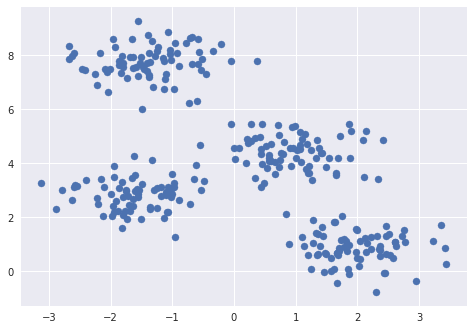

In [4]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. If you were to perform an exhaustive search for the different segmentations of the data, however, the search space would be exponential in the number of points. Fortunately, there is a well-known *Expectation Maximization (EM)* procedure which scikit-learn implements, so that KMeans can be solved relatively quickly.

/Users/bzenchenko/anaconda/envs/wids_clustering/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


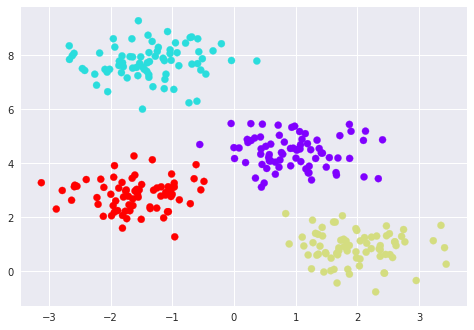

In [5]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

The algorithm identifies the four clusters of points in a manner very similar to what we would do by eye!

## The K-Means Algorithm: Expectation Maximization

K-Means is an example of an algorithm which uses an *Expectation-Maximization* approach to arrive at the solution.
*Expectation-Maximization* is a two-step approach which works as follows:

1. Guess some cluster centers
2. Repeat until converged
   A. Assign points to the nearest cluster center
   B. Set the cluster centers to the mean 
   
Let's quickly visualize this process:

/Users/bzenchenko/anaconda/envs/wids_clustering/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


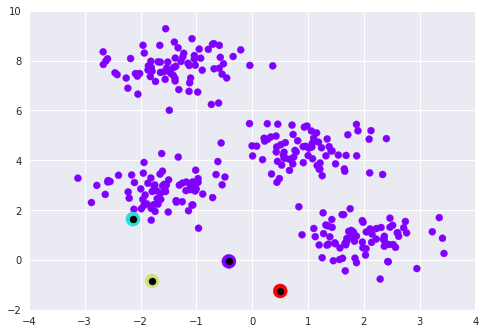

In [6]:
import os
import sys
sys.path.append(os.getcwd()+'fig_code')
from fig_code import plot_kmeans_interactive
plot_kmeans_interactive();

This algorithm will (often) converge to the optimal cluster centers.

### KMeans Caveats

The convergence of this algorithm is not guaranteed; for that reason, scikit-learn by default uses a large number of random initializations and finds the best results.

Also, the number of clusters must be set beforehand... there are other clustering algorithms for which this requirement may be lifted.

### Official MNIST Data - we will use the reduced scikit-learn version instead

<center>
    <img src="http://3.bp.blogspot.com/_UpN7DfJA0j4/TJtUBWPk0SI/AAAAAAAAABY/oWPMtmqJn3k/s320/mnist_originals.png">
</center>

The [MNIST database](http://yann.lecun.com/exdb/mnist/) of handwritten digits is a collection of labeled images that has been used to evaluate machine learning techniques since the '90's.
The core application of the MNIST data is to train computer vision systems to recognize handwritten text.
The post office, for example, is a major user of such systems---addresses on letters and packages are all photographed, read, and routed digitally, with only a few ambiguous cases verified by a human.

The MNIST data set has also become a reliable benchmark for learning methods.
It's small, but not tiny, and the data dimensionality (28x28 pixels) is big enough to cause some "curse of dimensionality" issues.
Also, the problem is highly non-linear, meaning a linear classification methods (like linear regression, but for predicting discete categories) don't perform so well on the raw data.
The MNIST [website](http://yann.lecun.com/exdb/mnist/) reports an extensive list of results obtained by different machine learning models, including neural nets, SVM, nearest neighbors, and others.

The data consists of 60,000 training images and 10,000 test images.
Each image is a 28x28 pixel, grayscale picture of a digit written either by a highschool student or an employee of the US Census Bureau.
The images have all been preprocessed to be clean and regular: only one digit appears in each image, and it appears directly in the center of the image.

The goal of the benchmark is to fit a model to the training set, and then use that model to predict which digit is in each of the test images.
The best results achieve a classification error rate of less than half of one percent.
This is often described as the "human error rate," because if you ask people to classify the images, they will also find about 0.5% of them to be comepletely inscutable.

## Application of KMeans to Digits

For a closer-to-real-world example, let's take a look at the digits data. Here we'll use KMeans to automatically cluster the data in 64 dimensions, and then look at the cluster centers to see what the algorithm has found.

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()

Let's dig into what is in the data:

In [8]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [9]:
digits.data.shape

(1797, 64)

In [10]:
digits.images.shape

(1797, 8, 8)

In [11]:
digits.target_names.shape

(10,)

In [12]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

So we have images that are 8x8 and then data with represents the 64 pixels that belong to each image.  We have 1797 images.

#### Clustering with 10 clusters

In [13]:
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

In [14]:
clusters.shape

(1797,)

We see ten clusters in 64 dimensions. Let's visualize each of these cluster centers to see what they represent:

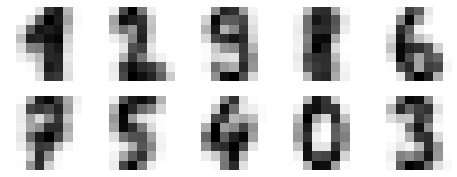

In [15]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

We see that *even without the labels*, KMeans is able to find clusters whose means are recognizable digits (with apologies to the number 8)!

The cluster labels are permuted; let's fix this:

In [16]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

For good measure, let's use our PCA visualization and look at the true cluster labels and K-means cluster labels:

/Users/bzenchenko/anaconda/envs/wids_clustering/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


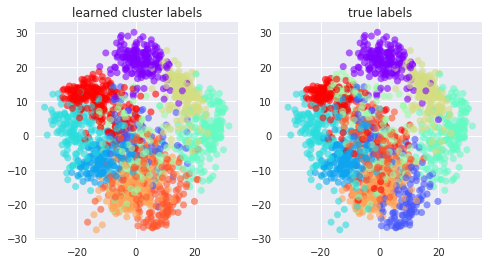

In [17]:
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(digits.data)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax[1].set_title('true labels');

Just for kicks, let's see how accurate our K-Means classifier is **with no label information:**

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.79410127991096269

80% – not bad! Let's check-out the confusion matrix for this:

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 154   0   2   0   7   7  13]
 [  0   7   0   0 163   0   0   7   4   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   0   0   0   0   0   0 177   2   0]
 [  0   5   3   2   0   4   2   5 101  52]
 [  0  20   0   6   0   6   0   7   2 139]]


/Users/bzenchenko/anaconda/envs/wids_clustering/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


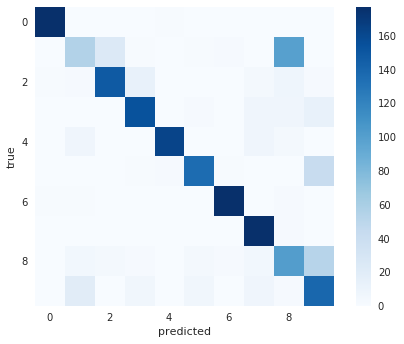

In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

## Cluster Evaluation:

Very important to use metrics to determine if this is the right approach to use and to compare different models:

http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

There are different metrics based on whether we have labels or not.  I have used metrics where labels are not available, make sure to check out sklearn's evaluation metrics to see a complete list.

http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient
http://scikit-learn.org/stable/modules/clustering.html#calinski-harabaz-index
Large list of eval metrics for unknown classes listed here: http://datascience.stackexchange.com/questions/10891/determinate-k-in-k-means-clustering/10909



In [20]:
from sklearn import metrics
metrics.calinski_harabaz_score(digits.data, clusters) # Higher is better

169.36397747143403

In [21]:
metrics.silhouette_score(digits.data, clusters, metric='euclidean')

0.18254074433905837

### DIY:

Try clustering into 8 or 5 clusters and see what the evaluation metrics look like.


# KNN :

## k-Nearest Neighbor Methods and Image Data

In addition, we will investigate an intuitive, yet powerful learning method called k-nearest neighbors (KNN).
Even though the type of data is different from what we've worked with so far, we'll see how to apply familiar tools to the data, namely, scikit learn and matplotlib for machine learning and plotting in python.


/Users/bzenchenko/anaconda/envs/wids_clustering/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


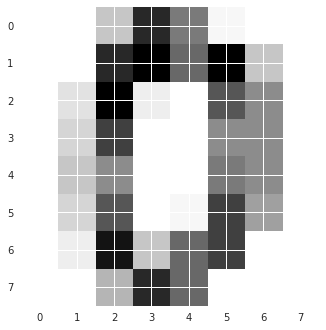

In [22]:
plt.imshow(digits.images[0], cmap="Greys")

It's a zero!
Now we're getting somewhere.

### DIY:

* Use `imshow` to visualize a number of images from `digits`. 

## Unsupervised KNN

Next, we're interested in uncovering more structure in the data.
For example, we want to be able to answer questions like "how similar are people's handwriting?" and "how distinct are the different digits?"
If we get a sense of the variance in the data, and of how tighly it is clustered, we can begin to see a good approach to modeling.

In the spirit of doing the simplest possible thing that might work, we can look at nearest neighbors using simple Euclidean distance between pixels.
The assumption is that most digits look the same, so they should have similar values in individual pixels.
Let's find out if this assumption is a good one.

We can use the [`sklearn.neighbors`](http://scikit-learn.org/stable/modules/neighbors.html) module to compute nearest neighbors, in particular with the [`NearestNeighbors`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) class:


In [23]:
%%time
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute').fit(digits.data)

CPU times: user 452 µs, sys: 94 µs, total: 546 µs
Wall time: 402 µs


Note how fast we built a nearest neighbors model, just a few microseconds!
This is because we're using the brute force implementation (`algorithm='brute'`), which simple stores the training data to build a model, and does a full pairwise comparison at query time.

Let's query our new model.  We can fetch the *k* nearest neighbors with the `kneighbors` method:

In [24]:
%%time
query_img = digits.data[0]
_, result = model.kneighbors(query_img, n_neighbors=4)

CPU times: user 2.34 ms, sys: 1.19 ms, total: 3.54 ms
Wall time: 2.28 ms


/Users/bzenchenko/anaconda/envs/wids_clustering/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Notice that query time is significant, even for a single image.
Also, notice that `kneighbors` returns two values.
The first, which we will ignore, are the distance values to the nearest neighbors.
The second is a list of indices where we can look up the nearest neighbors in the training set.

With the results, now we can see how we did.

In [25]:
print(result)

[[   0  877 1365 1541]]


There are four results, as expected.
Let's print them out with the utility function below:

In [26]:
# Display several images in a row
def show(imgs, n=1):
    fig = plt.figure()
    for i in range(1, n+1):
        fig.add_subplot(1, n, i, xticklabels=[], yticklabels=[])
        if n == 1:
            img = imgs
        else:
            img = imgs[i-1]
        plt.imshow(img.reshape(8,8), cmap="Greys")

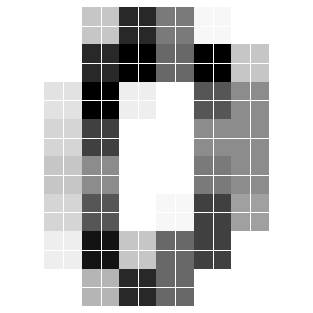

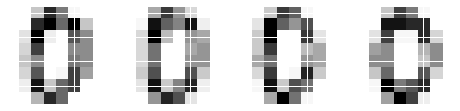

In [27]:
show(query_img)
show(digits.data[result[0],:], len(result[0]))

The neighbors look pretty good!
Importantly, they are all zeros.
That means that to some extent, at least, our assumption about images of the same digit being "close" to one another in pixel-space is a good one.

### DIY:

* Use the nearest neighbors model to inspect results for other images in the test set.  Do all of the digits seem to perform as well as "0" does?  You may want to increase "k" to find where things break down.

### DIY: 

Try a few other clustering methods on this data. Evaluate the results.

http://scikit-learn.org/stable/modules/clustering.html


## Time Permitted - 


https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch11/ch11.ipynb

https://github.com/scikit-learn-contrib/hdbscan/blob/master/notebooks/Comparing%20Clustering%20Algorithms.ipynb

https://github.com/gmonce/scikit-learn-book/blob/master/Chapter%203%20-%20Unsupervised%20Learning%20-%20Clustering%20Handwritten%20Digits.ipynb

https://colah.github.io/posts/2014-10-Visualizing-MNIST/


## Additional Resources:

- Excellent overview of heirarchical clustering and caveats of different clustering metrics: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
- Deep dive into clustering: http://nbviewer.jupyter.org/github/bejar/AMLTNotebooks/tree/master/Notebooks/
- Deep dive into kmeans and GMM clustering: https://github.com/morrislab/mlworkshop/blob/master/clustering/Clustering.ipynb
- Excellent deep dive course on clustering: https://www.coursera.org/learn/cluster-analysis (A favorite of mine)
- K-means brief overview: http://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/scikit-learn/scikit-learn-k-means.ipynb
- Clustering example notebook from John Hopkins Data Analysis class: http://nbviewer.jupyter.org/github/herrfz/dataanalysis/blob/master/week4/clustering_example.ipynb
- kmeans from scratch: http://johnloeber.com/docs/kmeans.html
- Comparing heirarchical clustering methods: http://nbviewer.jupyter.org/github/OxanaSachenkova/hclust-python/blob/master/hclust.ipynb
- Extract cluster elements from Python dendogram: https://gist.github.com/vals/150ec97a5b7db9c82ee9
